# Libraries:

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


# Exploring the data:

Reading the file:

In [6]:

df = pd.read_csv('goodreads_bbe_midbootcamp.csv')

In [78]:
df.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,contemporary,graphic,nonfiction,philosophy,lgbt,feminism,gender,fiction,awards_number,target_genres
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,0,0,0,0,0,0,0,1,41,4
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,0,0,0,0,0,0,0,1,9,6
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,0,0,0,0,0,0,0,1,4,3
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,0,0,0,0,0,0,0,1,0,2
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,0,0,0,0,0,0,0,1,25,2
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,0,0,0,0,0,0,0,1,20,3
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,0,0,0,0,0,0,0,1,2,3
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...","['Polly', 'Aslan', 'Lucy Pevensie', 'Edmund Pe...",...,0,0,0,0,0,0,0,1,0,6
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,0,0,0,0,0,0,0,1,0,5
9,18405.Gone_with_the_Wind,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,9780446675536,"['Classics', 'Historical Fiction', 'Fiction', ...","[""Scarlett O'Hara"", 'Rhett Butler', 'Ashley Wi...",...,0,0,0,0,0,0,0,1,2,2


In [8]:
#df.shape
#df.columns
#df.dtypes


Checking the NaN values:

In [9]:
# 12 columns with NaN values:
(df.isna().sum() !=0).sum()

12

In [10]:
# Checking how they are distributed (percentage):
df.isna().sum()
df.isnull().sum() * 100 / len(df)

bookId               0.000000
title                0.000000
series              55.276497
author               0.000000
rating               0.000000
description          2.549640
language             7.252563
isbn                 0.000000
genres               0.000000
characters           0.000000
bookFormat           2.806891
edition             90.557948
pages                4.472350
publisher            7.042951
publishDate          1.676893
firstPublishDate    40.637982
awards               0.000000
numRatings           0.000000
ratingsByStars       0.000000
likedPercent         1.185259
setting              0.000000
coverImg             1.152864
bbeScore             0.000000
bbeVotes             0.000000
price               27.373376
dtype: float64

In [11]:
df['pages'] = df['pages'].str.replace('\D+', '')
df['pages'].fillna(0, inplace=True)
df['pages'] = df['pages'].astype(int)
df=df.replace({'pages':{0: df["pages"].mean()} })
#df['pages'] = pd.to_numeric(df['pages'])

/var/folders/kt/dc2g95nx3wb67vskcbf0v2n40000gn/T/ipykernel_60081/340353151.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['pages'] = df['pages'].str.replace('\D+', '')


In [12]:
df=df.replace({'pages':{0: df["pages"].mean()} })

In [13]:
# df[["language"]].value_counts()

Problem with ISBN: it seems we have 1 ISBN for each book, but some of them aren't right (9999999999999):

In [14]:
# df[["isbn"]].value_counts

We have to choose the main genres. I've chosen the following:
- Fantasy / adventures
- Science Fiction
- Crime, thriller
- Horror, mistery
- Romance
- Humor
- Poetry
- Classics
- Drama
- Young Adult
- Childrens
- Nonfiction
- Historical
- Graphic
- LGBT
- Science Fiction

In [15]:
main_genres = ["fantasy", "sci_fi", "crime_and_thriller", "horror_and_mistery","romantic", "humor", "poetry","classics", "drama", "young_adult", "childrens", "nonfiction","historical", "contemporary", "graphic","nonfiction","philosophy", "lgbt","feminism","gender"]

In [16]:
# We can check the list:
print(main_genres)

['fantasy', 'sci_fi', 'crime_and_thriller', 'horror_and_mistery', 'romantic', 'humor', 'poetry', 'classics', 'drama', 'young_adult', 'childrens', 'nonfiction', 'historical', 'contemporary', 'graphic', 'nonfiction', 'philosophy', 'lgbt', 'feminism', 'gender']


We will assign numerical values to check which genre each book belongs to

In [17]:
df['fantasy'] = np.where(df['genres'].str.contains("Fantasy", case=False, na=False), 1, 0)
df['adventure'] = np.where(df['genres'].str.contains("Adventure", case=False, na=False), 1, 0)
df['sci_fi'] = np.where(df['genres'].str.contains("Science Fiction", case=False, na=False), 1, 0)
df['crime_and_thriller'] = np.where(df['genres'].str.contains("Crime" or "Thriller", case=False, na=False), 1, 0)
df['horror_and_mistery'] = np.where(df['genres'].str.contains("Horror" or "Mistery", case=False, na=False), 1, 0)
df['romantic'] = np.where(df['genres'].str.contains("Romantic", case=False, na=False), 1, 0)
df['humor'] = np.where(df['genres'].str.contains("Humor", case=False, na=False), 1, 0)
df['poetry'] = np.where(df['genres'].str.contains("Poetry", case=False, na=False), 1, 0)
df['classics'] = np.where(df['genres'].str.contains("Classics", case=False, na=False), 1, 0)
df['drama'] = np.where(df['genres'].str.contains("Drama", case=False, na=False), 1, 0)
df['young_adult'] = np.where(df['genres'].str.contains("Young Adult", case=False, na=False), 1, 0)
df['childrens'] = np.where(df['genres'].str.contains("Childrens", case=False, na=False), 1, 0)
df['historical'] = np.where(df['genres'].str.contains("Historical", case=False, na=False), 1, 0)
df['contemporary'] = np.where(df['genres'].str.contains("Contemporary", case=False, na=False), 1, 0)
df['graphic'] = np.where(df['genres'].str.contains("Graphic", case=False, na=False), 1, 0)
df['nonfiction'] = np.where(df['genres'].str.contains("Nonfiction", case=False, na=False), 1, 0)
df['philosophy'] = np.where(df['genres'].str.contains("Philosophy", case=False, na=False), 1, 0)
df['lgbt'] = np.where(df['genres'].str.contains("LGBT", case=False, na=False), 1, 0)
df['feminism'] = np.where(df['genres'].str.contains("Feminism", case=False, na=False), 1, 0)
df['gender'] = np.where(df['genres'].str.contains("Gender", case=False, na=False), 1, 0)
df['fiction'] = np.where(df['genres'].str.contains("Fiction", case=False, na=False), 1, 0)

In [18]:
for col in df[['fantasy', 'sci_fi', 'crime_and_thriller', 'horror_and_mistery', 'romantic', 'humor', 'poetry', 'classics', 'drama', 'young_adult', 'childrens', 'nonfiction', 'historical', 'contemporary', 'graphic', 'nonfiction', 'philosophy', 'lgbt', 'feminism', 'gender']]:
    print(df[[col]].value_counts())

fantasy
0          37157
1          15321
dtype: int64
sci_fi
0         45868
1          6610
dtype: int64
crime_and_thriller
0                     48712
1                      3766
dtype: int64
horror_and_mistery
0                     49571
1                      2907
dtype: int64
romantic
0           51492
1             986
dtype: int64
humor
0        48251
1         4227
dtype: int64
poetry
0         50883
1          1595
dtype: int64
classics
0           45543
1            6935
dtype: int64
drama
0        50059
1         2419
dtype: int64
young_adult
0              40600
1              11878
dtype: int64
childrens
0            47252
1             5226
dtype: int64
nonfiction
0             44227
1              8251
dtype: int64
historical
0             43524
1              8954
dtype: int64
contemporary
0               41765
1               10713
dtype: int64
graphic
0          50649
1           1829
dtype: int64
nonfiction
0             44227
1              8251
dtype: int64
philos

We have awards as diferent lists in each row, as we don't know all the awards, let's work with the number of awards (the sum) that one book has

In [19]:
awards = df["awards"].str.split(',', expand=True)
awards.head(3)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,['Locus Award Nominee for Best Young Adult Boo...,'Georgia Peach Book Award (2009)','Buxtehuder Bulle (2009)','Golden Duck Award for Young Adult (Hal Cleme...,"""Grand Prix de l'Imaginaire Nominee for Roman...",'Books I Loved Best Yearly (BILBY) Awards for...,"""West Australian Young Readers' Book Award (W...","""Red House Children's Book Award for Older Re...",'South Carolina Book Award for Junior and You...,'Charlotte Award (2010)',...,'Literaturpreis der Jury der jungen Leser for...,'The Inky Awards Shortlist for Silver Inky (2...,'Prix Et-lisez-moi (2011)','Missouri Gateway Readers Award (2011)','Oklahoma Sequoyah Award for High School and ...,'Premio El Templo de las Mil Puertas for Mejo...,"""Rebecca Caudill Young Readers' Book Award (2...",'LovelyBooks Leserpreis for Fantasy (2009)','LovelyBooks Leserpreis for Bestes Cover/Umsc...,'Premi Protagonista Jove for Categoria 13-14 ...
1,['Bram Stoker Award for Works for Young Reader...,'Anthony Award for Young Adult (2004)',"""Mythopoeic Fantasy Award for Children's Lite...",'Audie Award for Audiobook of the Year (2004)','Books I Loved Best Yearly (BILBY) Awards for...,'Colorado Blue Spruce Young Adult Book Award ...,'Golden Archer Award for Middle/Junior High (...,'Deutscher Jugendliteraturpreis Nominee for P...,'Carnegie Medal Nominee (2003)'],None,...,None,None,None,None,None,None,None,None,None,None
2,['Pulitzer Prize for Fiction (1961)','Audie Award for Classic (2007)','National Book Award Finalist for Fiction (19...,'Alabama Author Award for Fiction (1961)'],None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
#df['pages'] = df['pages'].astype(int)
#df['pages'] = pd.to_numeric(df['pages'])


In [21]:
for col in awards.columns:
    awards[col] = np.where(awards[col].str.contains("'", case=False, na=False), 1, 0)

In [22]:
awards['awards_number']= awards.sum(axis=1)

In [23]:
awards["awards_number"].head()

0    41
1     9
2     4
3     0
4    25
Name: awards_number, dtype: int64

In [24]:
df["awards_number"] = awards["awards_number"]

In [25]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,historical,contemporary,graphic,nonfiction,philosophy,lgbt,feminism,gender,fiction,awards_number
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,0,0,0,0,0,0,0,0,1,41
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,0,0,0,0,0,0,0,0,1,9
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,1,0,0,0,0,0,0,0,1,4
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,1,0,0,0,0,0,0,0,1,0
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,0,0,0,0,0,0,0,0,1,25


Let's define a column wich will allow us to check if one row matches one or more of the target genres

In [26]:
df["target_genres"] = df["fantasy"] +df['adventure'] +df['sci_fi'] + df['crime_and_thriller'] +  df['horror_and_mistery'] +  df['humor'] + df['poetry'] +  df['classics'] + df['drama'] +  df['young_adult'] + df['childrens'] + df['historical'] + df['contemporary'] + df['graphic'] + df['nonfiction'] + df['philosophy'] + df['lgbt'] + df["feminism"] + df["gender"]

In [27]:
df["target_genres"].head()

0    4
1    6
2    3
3    2
4    2
Name: target_genres, dtype: int64

First of all, we are going to focus on Fiction genres, so let's look for the intersection between fiction and the main genres

In [28]:
# Nontarget but fiction:
((df["target_genres"] == 0) & (df["fiction"] == 1)).sum() 

1156

We can drop 1156 rows of fiction that don't match any of the target genres

Second, let's look at the intersection between fiction and genres related to gender, feminism and lgbt topics

In [29]:
#Feminism, gender or lgbt and fiction:
((df["feminism"] == 1) |  (df["gender"] == 1) | (df["lgbt"] == 1) & (df["fiction"] == 1)).sum()

1812

# Cleaning data:

First we will remove rows an then columns, so we will have the same number of rows in each column if we want to reuse a column.

What to (not)drop and why
- bookId: drop the column. It's an identifier.
- title: drop the column. Identifies a book but it doesn't give us more information. Notice that title can influence people in their reading choices, but we can't measure it in this analysis
- series: drop the column. It could be interesting for an analysis based on the readings of a series of books whose first book was successful, but this is not our aim.
- author: drop the column. We will use it later, but we will not use it in the prediction model.
- rating: we need this column. Rows are 100 % complete and the values seems right, so we won't drop anything.
- description: drop this column. We could use it in another analysis.
- ISBN: drop this column, it's an identifier and some values are wrong.
- genres: we need the "encoded" columns. We will drop the rows that don't contain a target genre but are fiction.
- characters: drop this column. As author, it is interesting but we can't use it in the prediction model.
- bookFromat: We can use it, but we have to drop NaN or fill them.
- edition: drop the entire column.
- pages: we will use it. we can fill NaN with average number of pages by genre.
- publisher: drop it for the prediction model, maybe use it later.
- publishDate: we could keep it and check if older books have better ratings. But the problem is that we don't have all the first publish date so in many cases we cannot know how long the book has existed.
- ratingsByStars: we will drop it. It is confusing and we can use likedpercent, wich is a derived field.
- likedPercent: we keep this  column and drop NaN values (we have 99% of the data).
- coverImg: we can drop it. 99% of the data has a cover image so it doesn't give us any information
- bbeScore: we will use it. We have 100% of the information
- bbeVotes: we will use it. We have 100% of the information
- price: It could seem important but we will drop it. Some reasons: contemporary printed fiction books are fairly simiilarly priced. Despite of the fact that some  books are generally cheaper (for example, cheap editions of classics out of copy right), and some of them are generally more expensive (graphic novels) we can't know wich edition a person has read. If people read an edition that is not registered on Goodreads, they will probably enter their rating on the only edition they find available on the web, regardless of whether they have read an ebook version (cheaper), or downloaded a pirated version from the internet, or checked the book out of a library, or simply bought another edition. All we can know is how you rate your reading. (i.e. the price may not have affected the valuation at all)

Note: we will drop all the categorical data wich we didn't manipulate yet.
Note: our target variable will be the number of ratings as a measure of readership (??????)


First, let's make a copy of the data:

In [30]:
dfc = df

Now, let's take only the target genres of fiction books (remove nonfiction and nontarget)

In [31]:
#drop non target
dfc = df[df['target_genres'] > 0]
dfc = pd.DataFrame(dfc)

In [32]:
dfc.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,contemporary,graphic,nonfiction,philosophy,lgbt,feminism,gender,fiction,awards_number,target_genres
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,0,0,0,0,0,0,0,1,41,4
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,0,0,0,0,0,0,0,1,9,6
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,0,0,0,0,0,0,0,1,4,3
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,0,0,0,0,0,0,0,1,0,2
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,0,0,0,0,0,0,0,1,25,2


In [33]:
print(df.shape)
print(dfc.shape)

(52478, 48)
(45016, 48)


In [34]:
dfc = dfc[dfc["fiction"]== 1]

In [35]:
print(dfc.shape)

(40095, 48)


We have removed more than 12.000 rows. Im going to check if it affects our lgbt,feminism and gender data:

In [36]:
((dfc["feminism"] == 1) |  (dfc["gender"] == 1) | (dfc["lgbt"] == 1) & (dfc["fiction"] == 1)).sum()

1791

The result is very good, we have hardly lost any values

In [37]:
#dfc[""]

Let's continue with tge cleaning:

In [38]:
dfc = dfc.select_dtypes(include="number")

Checking tail and head: books with a low number of ratings have a good rating

In [39]:
dfc

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,fantasy,adventure,sci_fi,crime_and_thriller,...,contemporary,graphic,nonfiction,philosophy,lgbt,feminism,gender,fiction,awards_number,target_genres
0,4.33,374.0,6376780,96.0,2993816,30516,1,1,1,0,...,0,0,0,0,0,0,0,1,41,4
1,4.50,870.0,2507623,98.0,2632233,26923,1,1,1,0,...,0,0,0,0,0,0,0,1,9,6
2,4.28,324.0,4501075,95.0,2269402,23328,0,0,0,0,...,0,0,0,0,0,0,0,1,4,3
3,4.26,279.0,2998241,94.0,1983116,20452,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,3.60,501.0,4964519,78.0,1459448,14874,1,0,0,0,...,0,0,0,0,0,0,0,1,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,4.14,416.0,2143,95.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
52471,4.07,151.0,1947,94.0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,3
52475,3.70,280.0,6674,84.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,2
52476,3.85,507.0,238,90.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2


In [40]:
dfc
bbe = dfc.drop(["target_genres","nonfiction","philosophy","fiction"], axis=1)
dfc = dfc.drop(["bbeScore", "bbeVotes", "target_genres","nonfiction","philosophy","fiction"], axis=1)

In [41]:
dfc

,rating,pages,numRatings,likedPercent,fantasy,adventure,sci_fi,crime_and_thriller,horror_and_mistery,romantic,...,drama,young_adult,childrens,historical,contemporary,graphic,lgbt,feminism,gender,awards_number
0,4.33,374.0,6376780,96.0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,41
1,4.50,870.0,2507623,98.0,1,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,9
2,4.28,324.0,4501075,95.0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,4
3,4.26,279.0,2998241,94.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.60,501.0,4964519,78.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,4.14,416.0,2143,95.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
52471,4.07,151.0,1947,94.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
52475,3.70,280.0,6674,84.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
52476,3.85,507.0,238,90.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
bbe.isna().sum()
bbe = bbe.dropna()

In [43]:
dfc.isna().sum()
dfc = dfc.dropna()

In [44]:
dfc.columns

Index(['rating', 'pages', 'numRatings', 'likedPercent', 'fantasy', 'adventure',
       'sci_fi', 'crime_and_thriller', 'horror_and_mistery', 'romantic',
       'humor', 'poetry', 'classics', 'drama', 'young_adult', 'childrens',
       'historical', 'contemporary', 'graphic', 'lgbt', 'feminism', 'gender',
       'awards_number'],
      dtype='object')

In [45]:
dfc_genres = dfc[["numRatings",'fantasy', 'adventure',
       'sci_fi', 'crime_and_thriller', 'horror_and_mistery', 'romantic',
       'humor', 'poetry', 'classics', 'drama', 'young_adult', 'childrens',
       'historical', 'contemporary', 'graphic', 'lgbt', 'feminism', 'gender']]

dfc_genres = pd.DataFrame(dfc_genres)


In [46]:
ls = ()
dc= {}

a = dfc_genres[dfc_genres["fantasy"] ==1]
fantasy_mean_reads = a[['numRatings']].mean(axis=0)

b = dfc_genres[dfc_genres["adventure"] ==1]
adventure_mean_reads = b[['numRatings']].mean(axis=0)

c = dfc_genres[dfc_genres["sci_fi"] ==1]
sci_fi_mean_reads = c[['numRatings']].mean(axis=0)

d = dfc_genres[dfc_genres["crime_and_thriller"] ==1]
crime_and_thriller_mean_reads = d[['numRatings']].mean(axis=0)

e = dfc_genres[dfc_genres["horror_and_mistery"] ==1]
horror_and_mistery_mean_reads = e[['numRatings']].mean(axis=0)

f = dfc_genres[dfc_genres["romantic"] ==1]
romantic_mean_reads = f[['numRatings']].mean(axis=0)

g = dfc_genres[dfc_genres["humor"] ==1]
humor_mean_reads = g[['numRatings']].mean(axis=0)

h = dfc_genres[dfc_genres["poetry"] ==1]
poetry_mean_reads = h[['numRatings']].mean(axis=0)

i = dfc_genres[dfc_genres["classics"] ==1]
classics_mean_reads = i[['numRatings']].mean(axis=0)

j = dfc_genres[dfc_genres["drama"] ==1]
drama_mean_reads = j[['numRatings']].mean(axis=0)

k = dfc_genres[dfc_genres["young_adult"] ==1]
young_adult_mean_reads = k[['numRatings']].mean(axis=0)

l = dfc_genres[dfc_genres["childrens"] ==1]
childrens_mean_reads = l[['numRatings']].mean(axis=0)

m = dfc_genres[dfc_genres["historical"] ==1]
historical_mean_reads = m[['numRatings']].mean(axis=0)

n = dfc_genres[dfc_genres["contemporary"] ==1]
contemporary_mean_reads = n[['numRatings']].mean(axis=0)

o = dfc_genres[dfc_genres["graphic"] ==1]
graphic_mean_reads = o[['numRatings']].mean(axis=0)

p = dfc_genres[dfc_genres["lgbt"] ==1]
lgbt_mean_reads = p[['numRatings']].mean(axis=0)

q = dfc_genres[dfc_genres["feminism"] ==1]
feminism_mean_reads = q[['numRatings']].mean(axis=0)

r = dfc_genres[dfc_genres["gender"] ==1]
gender_mean_reads = q[['numRatings']].mean(axis=0)

genres_reads_dict = {'fantasy':fantasy_mean_reads, 'adventure':adventure_mean_reads,
       'sci_fi':sci_fi_mean_reads, 'crime_and_thriller':crime_and_thriller_mean_reads, 'horror_and_mistery': horror_and_mistery_mean_reads, 'romantic':romantic_mean_reads,
       'humor':humor_mean_reads, 'poetry':poetry_mean_reads, 'classics':classics_mean_reads, 'drama':drama_mean_reads, 'young_adult':young_adult_mean_reads,'childrens':childrens_mean_reads,
       'historical':historical_mean_reads, 'contemporary':contemporary_mean_reads, 'graphic':graphic_mean_reads, 'lgbt':lgbt_mean_reads, 'feminism':feminism_mean_reads, 'gender':gender_mean_reads}

    

<AxesSubplot:>

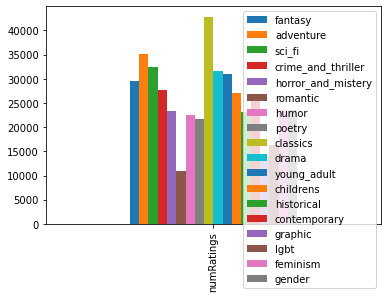

In [47]:
bar = pd.DataFrame(genres_reads_dict)
bar.plot.bar()

That's interesting, we have less lgbt, feminist or gender books but they don't have a low number of rates

In [48]:
dfc.isna().sum()

rating                0
pages                 0
numRatings            0
likedPercent          0
fantasy               0
adventure             0
sci_fi                0
crime_and_thriller    0
horror_and_mistery    0
romantic              0
humor                 0
poetry                0
classics              0
drama                 0
young_adult           0
childrens             0
historical            0
contemporary          0
graphic               0
lgbt                  0
feminism              0
gender                0
awards_number         0
dtype: int64

In [49]:
dfc.columns

Index(['rating', 'pages', 'numRatings', 'likedPercent', 'fantasy', 'adventure',
       'sci_fi', 'crime_and_thriller', 'horror_and_mistery', 'romantic',
       'humor', 'poetry', 'classics', 'drama', 'young_adult', 'childrens',
       'historical', 'contemporary', 'graphic', 'lgbt', 'feminism', 'gender',
       'awards_number'],
      dtype='object')

# ML predictions (I won't use this)

In [50]:
X = dfc.drop(["likedPercent","rating"],axis=1)
y = dfc["likedPercent"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)




In [51]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
predictions_train = lm.predict(X_train)
r2_train = r2_score(y_train, predictions_train)
print("R2 of train sample:",r2_train,)

predictions_test = lm.predict(X_test)
r2_test = r2_score(y_test, predictions_test)
r2_test
print('R2 test sample:',r2_test)

MSE = mean_squared_error(y_test,predictions_test)
RMSE = np.sqrt(mean_squared_error(y_test,predictions_test))
MAE = mean_absolute_error(y_test, predictions_test)
print(" MSE: \n", MSE," \n RMSE: \n", RMSE, "\n MAE: \n", MAE)

R2 of train sample: 0.0675788594272253
R2 test sample: 0.06673330394732502
 MSE: 
 22.678813176211598  
 RMSE: 
 4.762227753500624 
 MAE: 
 3.464843879012458


In [53]:
X = dfc.drop(["numRatings","rating"],axis=1)
y = dfc["numRatings"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [54]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [55]:
predictions_train = lm.predict(X_train)
r2_train = r2_score(y_train, predictions_train)
print("R2 of train sample:",r2_train,)

predictions_test = lm.predict(X_test)
r2_test = r2_score(y_test, predictions_test)
r2_test
print('R2 test sample:',r2_test)

MSE = mean_squared_error(y_test,predictions_test)
RMSE = np.sqrt(mean_squared_error(y_test,predictions_test))
MAE = mean_absolute_error(y_test, predictions_test)
print(" MSE: \n", MSE," \n RMSE: \n", RMSE, "\n MAE: \n", MAE)

R2 of train sample: 0.1391046349060543
R2 test sample: 0.08444379917325562
 MSE: 
 10718674763.120636  
 RMSE: 
 103531.03285064163 
 MAE: 
 31319.819425989645


from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train, y_train)


score = KNN.score(X_test, y_test)


# Best Books Ever list

In [61]:
bbe.head()

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,fantasy,adventure,sci_fi,crime_and_thriller,...,drama,young_adult,childrens,historical,contemporary,graphic,lgbt,feminism,gender,awards_number
0,4.33,374.0,6376780,96.0,2993816,30516,1,1,1,0,...,0,1,0,0,0,0,0,0,0,41
1,4.50,870.0,2507623,98.0,2632233,26923,1,1,1,0,...,0,1,1,0,0,0,0,0,0,9
2,4.28,324.0,4501075,95.0,2269402,23328,0,0,0,0,...,0,1,0,1,0,0,0,0,0,4
3,4.26,279.0,2998241,94.0,1983116,20452,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3.60,501.0,4964519,78.0,1459448,14874,1,0,0,0,...,0,1,0,0,0,0,0,0,0,25


In [60]:
bbe.shape

(40093, 25)

In [62]:
bbe = bbe[bbe['bbeScore'] > 0]
bbe = pd.DataFrame(bbe)

In [64]:
bbe.shape

(40088, 25)

Only 5 books have a 0 score points in BBE list

In [66]:
corrM = bbe.corr()
corrM

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,fantasy,adventure,sci_fi,crime_and_thriller,...,drama,young_adult,childrens,historical,contemporary,graphic,lgbt,feminism,gender,awards_number
rating,1.000000,0.168224,0.040538,0.857162,0.029100,0.029899,0.026374,0.073208,-0.006101,-0.050255,...,-0.036612,-0.023046,0.090197,-0.018432,-0.159141,0.130417,0.003584,0.001455,0.012299,-0.001021
pages,0.168224,1.000000,0.028045,0.101420,0.024052,0.024997,0.045766,0.051796,0.074110,0.021258,...,-0.008811,-0.049536,-0.135663,0.101663,-0.032750,-0.094850,-0.009495,-0.020503,-0.011491,0.022477
numRatings,0.040538,0.028045,1.000000,0.013695,0.709989,0.719773,0.040311,0.045139,0.036579,0.013079,...,0.017856,0.041531,0.013493,0.001778,0.011534,-0.014953,-0.009764,0.000889,-0.008396,0.341257
likedPercent,0.857162,0.101420,0.013695,1.000000,0.006419,0.006627,0.001089,0.099573,0.006546,0.041534,...,-0.038037,-0.058477,0.080454,0.030691,-0.137871,0.083559,-0.011991,-0.007726,0.009020,0.002281
bbeScore,0.029100,0.024052,0.709989,0.006419,1.000000,0.999306,0.023582,0.025267,0.019831,-0.006896,...,0.004644,0.026527,0.014519,0.018867,-0.010073,-0.011200,-0.001644,0.000353,-0.003865,0.195180
bbeVotes,0.029899,0.024997,0.719773,0.006627,0.999306,1.000000,0.024536,0.026148,0.019902,-0.007096,...,0.005547,0.027015,0.015610,0.020122,-0.010683,-0.011881,-0.002090,0.000525,-0.004119,0.198048
fantasy,0.026374,0.045766,0.040311,0.001089,0.023582,0.024536,1.000000,0.321949,0.508833,-0.170363,...,-0.141251,0.326771,0.146118,-0.133878,-0.253636,0.101030,-0.012277,-0.056043,-0.030580,0.038931
adventure,0.073208,0.051796,0.045139,0.099573,0.025267,0.026148,0.321949,1.000000,0.249388,-0.039392,...,-0.071325,0.282908,0.296337,0.015018,-0.180955,0.003218,-0.051654,-0.052368,-0.029005,0.019543
sci_fi,-0.006101,0.074110,0.036579,0.006546,0.019831,0.019902,0.508833,0.249388,1.000000,-0.084393,...,-0.092439,0.104584,-0.020664,-0.157038,-0.188919,0.058363,-0.004940,-0.027486,-0.010730,0.055283
crime_and_thriller,-0.050255,0.021258,0.013079,0.041534,-0.006896,-0.007096,-0.170363,-0.039392,-0.084393,1.000000,...,0.029994,-0.127839,-0.088220,-0.052448,0.012899,-0.024688,-0.027874,-0.030821,-0.018261,0.017223


# Exporting clean data:

In [70]:
fiction_df = df[df['target_genres'] > 0]
fiction_df = fiction_df[fiction_df["fiction"]== 1]
compression_opts = dict(method='zip',
                        archive_name='fiction_df.csv') 
fiction_df.to_csv('out.zip', index=False,
          compression=compression_opts) 